# 1

In [6]:
import itertools
from math import log

theta = list(itertools.permutations([0.2, 0.5, 0.3]))
L = list()
for t in theta:
    r = t[0]
    g = t[1]
    b = t[2]
    L.append(267*log(b*b)+73*log(g*g)+29*log(r*r)+140*log(g*b)+193*log(r*b)+298*log(r*g))
print(theta[L.index(max(L))])
print(max(L))
    

(0.2, 0.3, 0.5)
-2187.66013719814


# 2

In [5]:
import random
from math import sqrt
import seaborn as sb

def gen(theta, n):
    l = list()
    for i in range(n):
        l.append(random.uniform(-theta, theta))
    return l

def OMP(l):
    return max(-min(l), max(l))

def OMS(l):
    l.sort()
    n = len(l)
    d = sqrt(n**2*(l[-1]-l[0])**2-4*(1-n)*(n+1)*l[0]*l[-1])
    return (n*(l[-1]-l[0])+d)/(2*(n-1))

0.9999447649485895
1.0001154064171727


/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


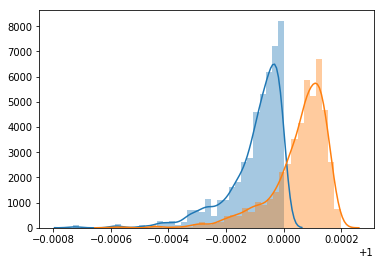

In [7]:
th = 1
n = 10000

l = gen(th,n)

print(OMP(l))
print(OMS(l))

omps = list()
omss = list()

for i in range(1000):
    l = gen(th,n)
    omps.append(OMP(l))
    omss.append(OMS(l))
    
sb.distplot(omps)
sb.distplot(omss)

Оценки не являются асимптотически нормальными

# 3

/usr/lib/python3.7/site-packages/scipy/optimize/_minimize.py:518: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


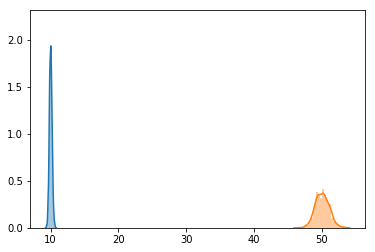

In [15]:
from scipy.optimize import minimize
from scipy import special, stats
import numpy as np
from math import log
import seaborn as sb

def L(ab,l):
    a = ab[0]
    b = ab[1]
    res = 1
    for x in l:
        res += -log(special.beta(a,b))+log(x)*(a-1)+log(1-x)*(b-1)
    return -res

def OMP(X):
    x0 = np.array([2,3])
    theta = minimize(L, x0, args=(X,),bounds = [(0, None),(0, None)], method='Nelder-Mead')
    return theta


n = 5000
a = 10
b = 50
aa = list()
bb = list()

for i in range(1000):
    X = list(stats.beta.rvs(a, b, size=n))
    th = OMP(X).x
    aa.append(th[0])
    bb.append(th[1])
    
sb.distplot(aa)
sb.distplot(bb)

Оценки асимптотически нормальны